### BI- WEEKLY CHALLENGE(2)

#### Importing neccessary libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Importing the data set

In [9]:
data = pd.read_csv('ship_info.csv')
data.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


### Calculate basic statistics of the data

In [10]:
data.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [12]:
data.shape

(158, 9)

In [13]:
data.mode()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Spirit,Royal_Caribbean,12,70.367,20.52,9.51,9.75,34.29,9.2


### Observation

# No missing values all features and target have 158 for count
From the analysis above there are 158 observations with 8 features and then target (crew)(9columns in total).
## Age
the mean age is 15.6, mode 12 while the maximum age is 48 and the minimum age is 4 (not a normal distribution, right skewed), 25% are age 10 and below, 50% are age 14 and below, 75% are age 20 and below.
## Tonnage
the mean tonnage is 71.284671, mode 70.367	 while the maximum tonnage is 220.000000, and the minimum tonnage is 2.329000	 25% are  46.013000 and below, 50% are age 71.899000 and below, 75% are 90.772500 and below.(not a normal distribution, right skewed)
## passengers
the mean number of passengers is 18 approx, mode 20.52	 while the maximum is 54, and the minimum  is 1 approx, 25% are  13 padssengers, 50% are 20 (19.500000)in number and below, 75% are 25 .(not a normal distribution, right skewed)

## Length
the mean length is 8.130633, mode 9.51	 while the maximum length is 11.820000, and the minimum  length is 2.790000 25% are  7.100000 and below, 50% percentile is 8.555000 and below, 75% are 9.510000	 and below.(not a normal distribution, left skewed)
## Cabins
the mean number of cabins is 8.830000, mode 9.75	 while the maximum is 27.000000, and the minimum  is 	0.330000 (not a gaussian distribution, right tailed), 25% are  6.132500 cabins, 50% are 9.570000 in number and below, 75% are 10.885000.(not a normal distribution, right skewed)
## Passenger_density
the mean is 39.900949, mode is 34.29 while the maximum is 71.430000, and the minimum  is 17.700000 (not a gaussian distribution, right tailed), 25% of the passenger density are 134.570000 and below, 50% are 39.085000, 75% are 44.185000.
## Crew 
Crew is left skewed as the median is higher than the mean and the mode is highest


In [14]:
data.crew = data.crew.astype(int)

In [15]:
data.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10


## Drop Ship-name and Cruise line as the don't have any effects on crew size

In [16]:
data2=data.drop(["Ship_name", "Cruise_line"], axis=1)  

## Select columns/ Correlation 

For us to drop less important columns we would need to perform correlations, to avoid overfitting we need to only peform this on the training set and then later implememt changes in our test set.

In [49]:
data2.corr()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
Age,1.000000,-0.606646,-0.515542,-0.532286,-0.510019,-0.278830,-0.527998
Tonnage,-0.606646,1.000000,0.945061,0.922368,0.948764,-0.040846,0.916374
passengers,-0.515542,0.945061,1.000000,0.883535,0.976341,-0.294867,0.906270
length,-0.532286,0.922368,0.883535,1.000000,0.889798,-0.090488,0.890489
cabins,-0.510019,0.948764,0.976341,0.889798,1.000000,-0.253181,0.944400
passenger_density,-0.278830,-0.040846,-0.294867,-0.090488,-0.253181,1.000000,-0.155790
crew,-0.527998,0.916374,0.906270,0.890489,0.944400,-0.155790,1.000000


# separate dataset into train and test

In [50]:
X = data2.drop("crew",axis=1)   #Feature Matrix
y = data2["crew"]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.4,
    random_state=0)

X_train.shape, X_test.shape

((94, 6), (64, 6))

checking the features in the training data to see, features that are highly correlated wth one another, so we can reduce the noise

In [52]:
X_train.corr()

,Age,Tonnage,passengers,length,cabins,passenger_density
Age,1.000000,-0.554958,-0.452411,-0.470819,-0.466268,-0.280327
Tonnage,-0.554958,1.000000,0.937995,0.933107,0.949537,-0.027880
passengers,-0.452411,0.937995,1.000000,0.888901,0.982451,-0.297032
length,-0.470819,0.933107,0.888901,1.000000,0.905575,-0.066359
cabins,-0.466268,0.949537,0.982451,0.905575,1.000000,-0.264573
passenger_density,-0.280327,-0.027880,-0.297032,-0.066359,-0.264573,1.000000


### To easily help identify the highly correlated features along with the heatmap above

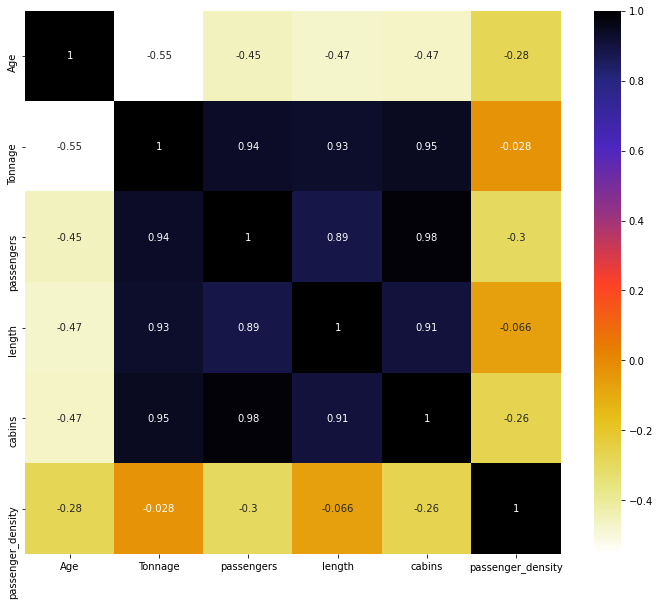

In [53]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

### To help check the relationship between the features and the target

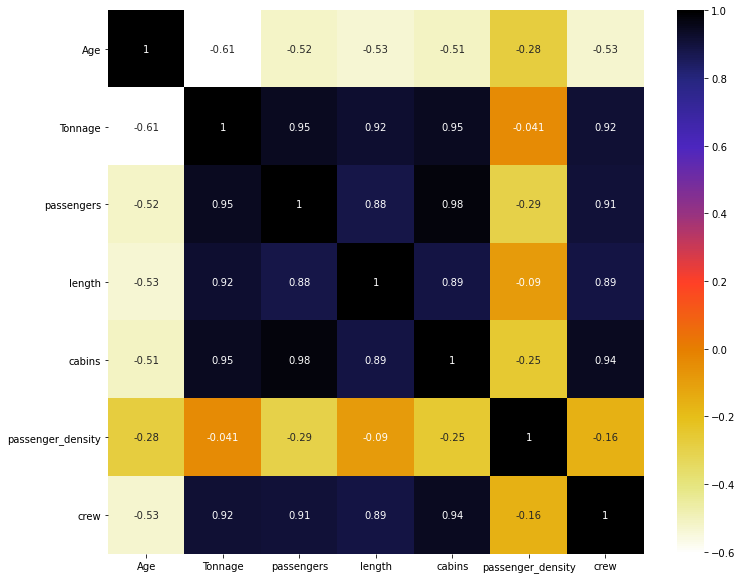

In [54]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
corrrr = data.corr()
sns.heatmap(corrrr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

  From the above **cabins, length, passengers and tonnage** are highly correlated with the target **crew size**, Hence however tonnage affects our predictiction would thesame as cabin, length, and passengers.

#### With the function below we can select highly correlated features the training data set

In [55]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

##### calling the correlation function created above on the dataset Xtrain to help pick the features that are highly correlated  and threshold set to 70%

In [56]:
corr_features = correlation(X_train, 0.7) #setting the treshold to 70%
len(set(corr_features))

3

In [57]:
corr_features

{'cabins', 'length', 'passengers'}

These three are highly correlated, which is pointer to the fact that they all have appriximately thesane effect.
Since the three have very high correlation with **tonnage** (0.95,0.92,and 0.95),tonnage should remain in place of the three.

##### The effect tonnage has on the crew size would eventually be thesame for cabins, length and passengers, so we drop them 

### Dropping the highly correlating features on the train and test data set 

In [58]:
X_train_new = X_train.drop(corr_features,axis=1)
X_test_new = X_test.drop(corr_features,axis=1)

In [59]:
X_train_new 

,Age,Tonnage,passenger_density
89,15,30.277,44.26
119,12,138.000,44.32
126,5,160.000,44.03
50,15,83.338,47.62
95,18,69.153,36.74
...,...,...,...
9,6,110.239,29.79
103,12,108.865,39.47
67,5,133.500,33.72
117,16,19.200,60.00


### Finding best model using hyper parameter tunning and Cross fold validation to select the best model to be used for training and testing

In [60]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression


In [61]:
model_params = {
    'svm': {
        'model': svm.SVR(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    }     
}

In [62]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_new, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\paul\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\paul\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\paul\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\paul\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


,model,best_score,best_params
0,svm,0.851748,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.478363,{'n_estimators': 5}
2,logistic_regression,0.330409,{'C': 1}
3,naive_bayes_gaussian,0.413450,{}
4,naive_bayes_multinomial,0.425146,{}
5,LinearRegression,0.854997,{}


LinearRegression  with 85.49% score wuld be selected

#### LinearRegression

In [76]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train_new, y_train)

In [78]:
y_pred = reg.predict(X_test_new)

In [75]:
print(y_pred.astype(int))

[ 7  7  3  9  5  7  6  7 11  5  7 13  7  5  7 11 15  8  1  8  5  5  5  7
  3  5 11  7  1  5  8  5  8  8 20 11  7  6  7  8  8 10  7  7  8  6 12  6
  5  5  2 11  1 11  6 13  4  1  0  7 11  7  3 13]


We need to also score the test data set to confirm model performance incase of over fitting , although we already perfomed, hyperparameter tunning and cs fold (Grid search Cv).

In [82]:
reg_all = LinearRegression()

In [83]:
reg_all.fit(X_test_new, y_test)

LinearRegression()

In [84]:
reg_all.score(X_test_new, y_test)

0.8363728296536221

our model performed great on the test data also, 83.6%

### Overfitting 

Overfitting happens when a model captures noise (randomness) instead of signal (the real effect). As a result, the model performs impressively in a training set, but performs poorly in a test set. All data set has two patterns:

**Random effect:**  The random effect is a randomness (noise) in our data. It is different in all data sets. A model will be overly optimistic in training set because it becomes specialized in a randomness in data. For instance, if an employee received back to back annual promotions, our model would treat this randomness as a real effect and take this into account while making salary prediction. Most employees only get an annual default raise and no promotions.          

**Real effect**: The real effect is an underlying pattern (signal) in our data that we are interested in. It is the same in all data sets. All employees receiving 5% raise each year in a company regardless of their promotions, is an example of real effect that our model should consider while making salary prediction.          

## How to Deal with Overfitting?
**Cross-validation**: Cross-validation is a model validation technique where we evaluate the quality of our model in an unseen data set. In cross-validation, training and validation are done together. K-fold cross validation and leave one out cross validation (LOOCV) are two most popular cross-validation techniques.

**Dimension reduction**: If our data have an overwhelming number of attributes and multicollinearity between the attributes, we should use dimension reduction models such as Principal Component Analysis (PCA) and feature selection such as LASSO and Elastic Net regression. This helps to make our model simpler and better.

**Regularization**: Regularization method adds a penalty term for complex models to avoid the risk of overfitting. It is a form of regression which shrinks coefficients of our features towards zero. However, applying regularization to an overly simple model leads to underfitting, a situation where a machine ignores real effects, i.e. signal.

### Difference between variance and bias

**What is Bias?**
The tendency of the algorithm to learn wrong details from the dataset by not taking into consideration all the information. It is the difference between the predicted value and the correct value which we need to predict.

High bias means inaccurate predictions. Parametric algorithms are prone to high bias. Parametric model summarizes data with a set of parameters of fixed size. Since these models pay very little attention to the training data and too much simplifies it. Therefore, leads to a high error on training and testing data(hence underfitting it). For example Linear Regression, Linear Discriminant Analysis, and Logistic Regression.

**What is a Variance?**
A variance occurs when the models work too good on training data. But does not work well on testing data or validation data. It shows how much scattered is the predicted value from the actual value. High variance causes the algorithm to model the random things in the training data. Instead of the intended output(hence overfitting it).

## When Will You Use Classification over Regression?

**Classification** is used when the output variable is a category such as “red” or “blue”, “spam” or “not spam”. It is used to draw a conclusion from observed values. Differently from, **regression** which is used when the output variable is a real or continuous value like “age”, “salary”, etc. When we must identify the class, the data belongs to we use classification over regression. Like when you must identify whether a name is male or female instead of finding out how they are correlated with the